# Boston House Price Predictions

Rather than applying traditional machine learning techniques on this dataset, as is the norm, in this notebook we'll look at forming a Deep Neural Network (DNN) for regression. This is normally difficult with such a small dataset and a DNN, since the complexity of this type of model tends to significantly overfit the data at hand.

Within this notebook, I'll exemplify some good practices to counteract overfitting during training, with a particular emphasis on DNNs.

---

## 1. Import dependencies and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
PATH =  "/kaggle/input/boston-house-prices/"

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing_df = pd.read_csv(PATH + 'housing.csv', header=None, delimiter=r"\s+", names=column_names)

print("Shape of housing dataset: {0}".format(housing_df.shape))

housing_df.head(5)

Shape of housing dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


---
## 2. Split our data into training and testing partitions.

In [4]:
train_data = housing_df.iloc[:404, :].copy()
test_data = housing_df.iloc[404:, :].copy()

X_train = train_data.iloc[:, :-1].copy()
y_train = train_data.iloc[:, -1:].copy()

X_test = test_data.iloc[:, :-1].copy()
y_test = test_data.iloc[:, -1:].copy()

In [5]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000
mean,1.915899,14.232673,9.502327,0.086634,0.531732,6.333109,64.427475,4.174214,6.789604,352.910891,18.026238,379.971757,11.35495
std,6.218916,25.311515,6.536251,0.281646,0.114497,0.731923,29.053901,2.181423,6.504268,131.554089,2.220211,40.516980,6.82339
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,70.800000,1.73000
25%,0.066358,0.000000,4.330000,0.000000,0.442000,5.890500,38.025000,2.287225,4.000000,276.000000,16.600000,381.187500,6.34250
50%,0.165995,0.000000,7.225000,0.000000,0.507000,6.227500,69.550000,3.842850,5.000000,307.000000,18.400000,392.580000,9.66000
75%,0.775792,20.250000,15.040000,0.000000,0.605000,6.679250,92.250000,5.623350,6.000000,403.000000,20.200000,396.900000,14.66250
max,88.976200,100.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,37.97000


---
## 3. Normalization of our features

With many features that are heterogeneous, we should definitely consider standardising our data through normalisation. For this we should calculate the mean and standard deviation of the features within the training data, and use this to normalise both the training and test sets.

In the following code, we'll normalize our data with zero mean and unit standard deviation. We'll obtain the mean and standard deviation using the training partition, which we will then use to normalize both the training and test splits.

In [6]:
def feature_normalisation(train_data, test_data):
    """ Normalize our dataframe features with zero mean and unit
        standard deviation """
    
    std_data = train_data.copy()
    
    mean = train_data.mean(axis=0)
    std_dev = train_data.std(axis=0)
    
    # centre data around zero mean and give unit std dev
    std_data -= mean
    std_data /= std_dev
    
    # if test data passed to func, convert test data using train mean / std dev
    test_data -= mean
    test_data /= std_dev
        
    return std_data, test_data

In [7]:
X_train, X_test = feature_normalisation(X_train, X_test)

Prior to producing a neural network model and making subsequent predictions on an evaluated model, lets visualise the relative importance of features using an off the shelf random forrest regressor.

In [8]:
ranf = RandomForestRegressor(random_state=1)
ranf.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

1     RM                        0.60021
2     LSTAT                     0.19601
3     DIS                       0.07016
4     CRIM                      0.05290
5     PTRATIO                   0.01781
6     TAX                       0.01693
7     AGE                       0.01078
8     B                         0.01042
9     NOX                       0.01042
10    INDUS                     0.00762
11    RAD                       0.00508
12    ZN                        0.00098
13    CHAS                      0.00067


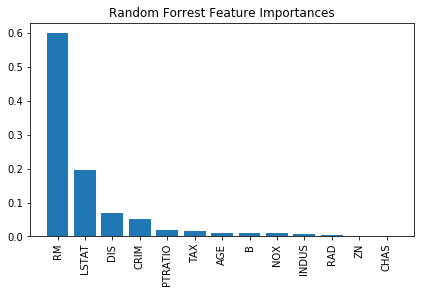

In [9]:
columns = list(X_train.columns)

importances = ranf.feature_importances_
indices = np.argsort(importances)[::-1]
cols_ordered = []

for feat in range(X_train.shape[1]):
    print("{0:<5} {1:<25} {2:.5f}".format(feat + 1, columns[indices[feat]], importances[indices[feat]]))
    cols_ordered.append(columns[indices[feat]])
    
plt.figure(figsize=(6,4))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), cols_ordered, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.title("Random Forrest Feature Importances")
plt.show()

It's clear that the only two really important features in our dataset appears to be LSTAT and RM. In comparison to these, the others are almost negigible in terms of their correlation to changing the output house price. However, since we are using a neural network in the following lines of code, we will retain all columns and train our model accordingly, regardless of their importance. If we were using more traditional methods, such as random forests, support vector machine or simple linear regression, we would likely benefit from reduction of some of these less important features.

---
## 4. Formation of Deep Neural Network for regression

Forming a deep neural network for regression is relatively simple, especially when armed with high-level libraries like Keras or PyTorch. For regression tasks, we simply need to ensure our final output layer has no activation, unlike in classification tasks where we employ sigmoid or softmax output activations.

In [10]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [11]:
def nn_model(dropout=False):
    """ Create a basic Deep NN for regression """
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

With such a small dataset, we're best employing K-means cross-validation, which makes more from our data than using just one dedicated partition of samples for the validation set.

In [12]:
k = 4

num_val_samples = len(X_train) // k

epochs = 100

scores = []

# prepare validation and training partitions
for i in range(k):
    print('Cross-validation fold number {0}'.format(i))
    val_samples_x = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_samples_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    print("X Val: {0}, y Val: {1}".format(val_samples_x.shape, val_samples_y.shape))
    
    train_samples_x = np.concatenate([X_train[:i * num_val_samples],
                                      X_train[(i + 1) * num_val_samples:]], axis=0)
    
    train_samples_y = np.concatenate([y_train[:i * num_val_samples], 
                                      y_train[(i + 1) * num_val_samples:]], axis=0)
    
    print("X Train: {0}, y Train: {1}".format(train_samples_x.shape, train_samples_y.shape))
    
    # instantiate model and fit training samples, then evaluate on val partition
    model = nn_model()
    model.fit(train_samples_x, train_samples_y, epochs=epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_samples_x, val_samples_y, verbose=0)
    scores.append(val_mae)

Cross-validation fold number 0
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 1
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 2
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 3
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)


In [13]:
print(np.mean(scores))

4.8270609974861145


Repeat again but obtain a record of our validation performance at each epoch across all folds.

In [14]:
k = 4

num_val_samples = len(X_train) // k

epochs = 100

mae_histories = []

# prepare validation and training partitions
for i in range(k):
    print('Cross-validation fold number {0}'.format(i))
    val_samples_x = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_samples_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    print("X Val: {0}, y Val: {1}".format(val_samples_x.shape, val_samples_y.shape))
    
    train_samples_x = np.concatenate([X_train[:i * num_val_samples],
                                      X_train[(i + 1) * num_val_samples:]], axis=0)
    
    train_samples_y = np.concatenate([y_train[:i * num_val_samples], 
                                      y_train[(i + 1) * num_val_samples:]], axis=0)
    
    print("X Train: {0}, y Train: {1}".format(train_samples_x.shape, train_samples_y.shape))
    
    # instantiate model and fit training samples, then evaluate on val partition
    model = nn_model()
    history = model.fit(train_samples_x, train_samples_y, 
                        epochs=epochs, batch_size=1, 
                        verbose=0, validation_data=(val_samples_x, val_samples_y))
    
    val_mae_hist = history.history['val_mae']
    
    mae_histories.append(val_mae_hist)

Cross-validation fold number 0
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 1
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 2
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 3
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)


In [15]:
average_mae_hist = [np.mean([x[i] for x in mae_histories]) for i in range(epochs)]

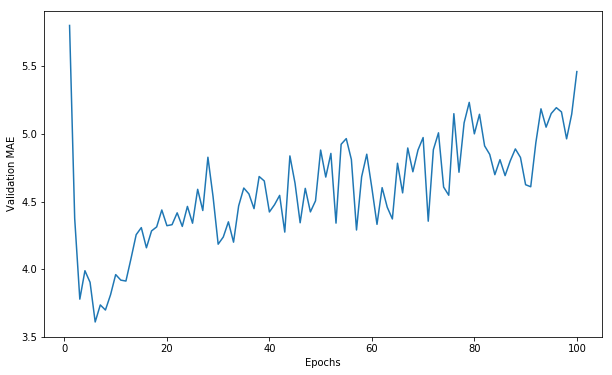

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

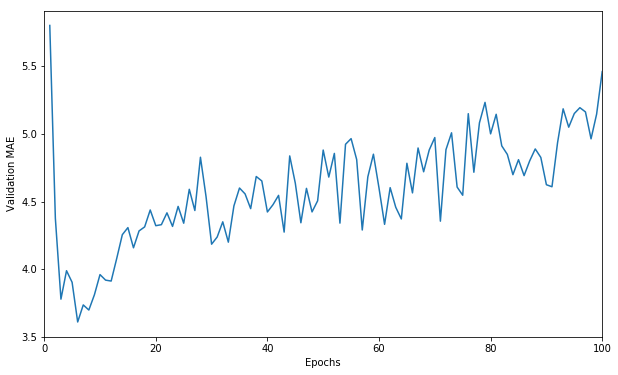

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.xlim(0.0, 100.0)
plt.show()

As we can see, even after a very low number of iterations we begin to over-fit on our data. This is expected with such a small dataset of only 500 samples. To counteract this, we have made use of cross-folds validation. Something that we can apply further to this is regularisation.

Below we'll apply dropout regularisation in an effort to reduce overfitting.

In [18]:
k = 4

num_val_samples = len(X_train) // k

epochs = 100

reg_mae_histories = []

# prepare validation and training partitions
for i in range(k):
    print('Cross-validation fold number {0}'.format(i))
    val_samples_x = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_samples_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    print("X Val: {0}, y Val: {1}".format(val_samples_x.shape, val_samples_y.shape))
    
    train_samples_x = np.concatenate([X_train[:i * num_val_samples],
                                      X_train[(i + 1) * num_val_samples:]], axis=0)
    
    train_samples_y = np.concatenate([y_train[:i * num_val_samples], 
                                      y_train[(i + 1) * num_val_samples:]], axis=0)
    
    print("X Train: {0}, y Train: {1}".format(train_samples_x.shape, train_samples_y.shape))
    
    # instantiate dropout regularised model and fit training samples with val data for eval
    model = nn_model(dropout=True)
    history = model.fit(train_samples_x, train_samples_y, 
                        epochs=epochs, batch_size=1, 
                        verbose=0, validation_data=(val_samples_x, val_samples_y))
    
    val_mae_hist = history.history['val_mae']
    
    reg_mae_histories.append(val_mae_hist)

average_reg_mae_hist = [np.mean([x[i] for x in reg_mae_histories]) for i in range(epochs)]

Cross-validation fold number 0
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 1
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 2
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)
Cross-validation fold number 3
X Val: (101, 13), y Val: (101, 1)
X Train: (303, 13), y Train: (303, 1)


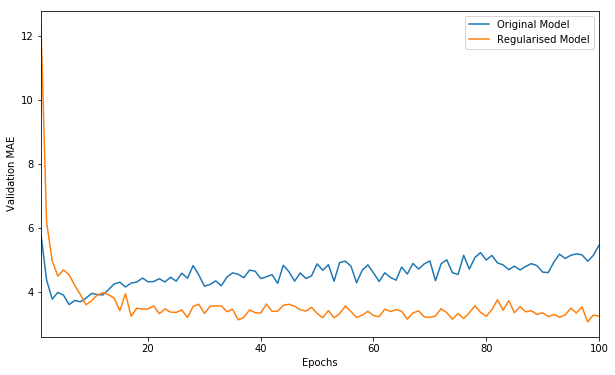

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist, label='Original Model')
plt.plot(range(1, len(average_reg_mae_hist) + 1), average_reg_mae_hist, label='Regularised Model')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.xlim(1.0, 100.0)
plt.legend(loc='best')
plt.show()

Our dropout regularised model is much better in terms of reducing overfitting.

---
## 5. Formation of our evaluated model into a final model

#### Finally, lets make a final model with the entire training set, followed by predictions for our test set using the trained model.

In [20]:
# produce our deep NN model using dropout regularisation, trained on all training data
final_model = nn_model(dropout=True)
history = final_model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)

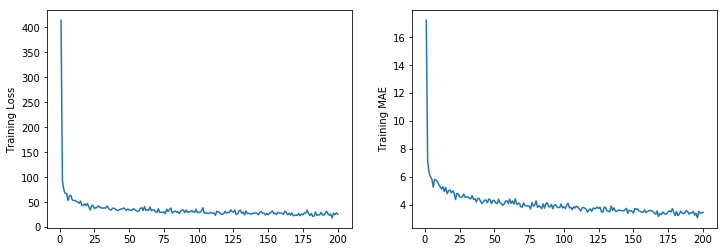

In [21]:
hist_dict = history.history

trg_loss = history.history['loss']
trg_acc = history.history['mae']

epochs = range(1, len(trg_acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(epochs, trg_loss, label='Training Loss')
ax[1].plot(epochs, trg_acc, label='Training MAE')
ax[0].set_ylabel('Training Loss')
ax[1].set_ylabel('Training MAE')

plt.show()

In [22]:
test_preds = final_model.predict(X_test)

In [23]:
test_mse, test_mae = final_model.evaluate(X_test, y_test, verbose=0)

In [24]:
print("Test set performance: \n- Test MSE: {0} \n- Test MAE: {1}".format(test_mse, test_mae))

Test set performance: 
- Test MSE: 19.653522902844 
- Test MAE: 3.5048654079437256


Our final test set performance is not bad - only 3.21 Mean Absolute Error (MAE)! Basically the average amount that our predictions of house prices deviated from the actual values was $3210. When we consider how varying houses can be, coupled with their relatively high prices, this is not a bad average error to have in our set of predictions, especially with the extremely low amount of data-preprocessing and feature engineering conducted in this notebook to obtain this model.